In [132]:
import requests
from bs4 import BeautifulSoup
import bs4
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36'}
querylist = []


In [3]:
def getquery(url):
    url = url
    r = requests.get(url,headers=headers)
    soup = bs4.BeautifulSoup(r.text,'html5lib')
    #setting search results
    tender = soup.find_all("div",{"class":"search-result"})
    for items in tender:
        query = {
        "title": items.find('div',{'class':'search-result-header'}).text,
        "dept" : items.find('div',{'class':'search-result-sub-header wrap-text'}).text,
        "procurement_stage":(items.find_all('div',{"class":"search-result-entry"})[0].text),
        "notice_status": (items.find_all('div',{"class":"search-result-entry"})[1].text),
        "closing date" :(items.find_all('div',{"class":"search-result-entry"})[2].text),
        "contract location": (items.find_all('div',{"class":"search-result-entry"})[3].text),
        "contract_value":(items.find_all('div',{"class":"search-result-entry"})[4].text),
        "pubication_date":(items.find_all('div',{"class":"search-result-entry"})[-1].text)
        }    
        querylist.append(query)
    return
   

In [4]:
getquery("https://www.contractsfinder.service.gov.uk/Search/Results?&page=1#dashboard_notices")
    

In [5]:
print(querylist)

[{'title': '\n\t\t\tGB-Bath: Cryogen-Free Cryostat\t\t', 'dept': 'University of Bath', 'procurement_stage': 'Procurement stage Opportunity', 'notice_status': 'Notice status Open', 'closing date': 'Closing 14 April 2022,  2pm', 'contract location': 'Contract location South West', 'contract_value': 'Contract value £50,000 to £100,000', 'pubication_date': 'Publication date  1 April 2022'}, {'title': '\n\t\t\tL22021-T-JC Christmas Decorations 2022\t\t', 'dept': 'London Luton Airport', 'procurement_stage': 'Procurement stage Opportunity', 'notice_status': 'Notice status Open', 'closing date': 'Closing  9 May 2022, 12:01pm', 'contract location': 'Contract location LU2 9LY', 'contract_value': 'Contract value £150,000 to £200,000', 'pubication_date': 'Publication date  1 April 2022'}, {'title': '\n\t\t\tCLOSED CHURCHYARDS (1052) 3 YEAR TERM SERVICES CONTRACT. REPAIR AND MAINTENANCE WORKS TO BOUNDARY WALLS, FENCES AND FOOTPATHS\t\t', 'dept': 'Teignbridge District Council', 'procurement_stage': 

In [7]:
for num in range(1,112):
    a ="https://www.contractsfinder.service.gov.uk/Search/Results?&page="
    b =str(num)
    c ="#dashboard_notices"
    url = a + b + c
    
    getquery(url)

In [8]:
print(querylist)

[{'title': '\n\t\t\tGB-Bath: Cryogen-Free Cryostat\t\t', 'dept': 'University of Bath', 'procurement_stage': 'Procurement stage Opportunity', 'notice_status': 'Notice status Open', 'closing date': 'Closing 14 April 2022,  2pm', 'contract location': 'Contract location South West', 'contract_value': 'Contract value £50,000 to £100,000', 'pubication_date': 'Publication date  1 April 2022'}, {'title': '\n\t\t\tL22021-T-JC Christmas Decorations 2022\t\t', 'dept': 'London Luton Airport', 'procurement_stage': 'Procurement stage Opportunity', 'notice_status': 'Notice status Open', 'closing date': 'Closing  9 May 2022, 12:01pm', 'contract location': 'Contract location LU2 9LY', 'contract_value': 'Contract value £150,000 to £200,000', 'pubication_date': 'Publication date  1 April 2022'}, {'title': '\n\t\t\tCLOSED CHURCHYARDS (1052) 3 YEAR TERM SERVICES CONTRACT. REPAIR AND MAINTENANCE WORKS TO BOUNDARY WALLS, FENCES AND FOOTPATHS\t\t', 'dept': 'Teignbridge District Council', 'procurement_stage': 

In [ ]:
querylist.to_csv("ukcontractsmetadata")

In [9]:
df= pd.DataFrame(querylist)
df.head(50)

,title,dept,procurement_stage,notice_status,closing date,contract location,contract_value,pubication_date
0,\n\t\t\tGB-Bath: Cryogen-Free Cryostat\t\t,University of Bath,Procurement stage Opportunity,Notice status Open,"Closing 14 April 2022, 2pm",Contract location South West,"Contract value £50,000 to £100,000",Publication date 1 April 2022
1,\n\t\t\tL22021-T-JC Christmas Decorations 2022...,London Luton Airport,Procurement stage Opportunity,Notice status Open,"Closing 9 May 2022, 12:01pm",Contract location LU2 9LY,"Contract value £150,000 to £200,000",Publication date 1 April 2022
2,\n\t\t\tCLOSED CHURCHYARDS (1052) 3 YEAR TERM ...,Teignbridge District Council,Procurement stage Opportunity,Notice status Open,"Closing 29 April 2022, 12pm",Contract location South West,Contract value £0,Publication date 1 April 2022
3,"\n\t\t\tDesign, Supply and Installation of Sol...",The Borough Council of Calderdale,Procurement stage Opportunity,Notice status Open,"Closing 13 May 2022, 12pm",Contract location Yorkshire and the Humber,"Contract value £70,000 to £100,000",Publication date 1 April 2022
4,\n\t\t\tNCC624 Belford First School Roofing Wo...,Northumberland County Council,Procurement stage Opportunity,Notice status Open,"Closing 21 April 2022, 12pm",Contract location England,"Contract value £150,000","Publication date 29 March 2022, last edited 1..."
5,\n\t\t\tEastBrook School Additional Resource P...,London Borough of Barking and Dagenham,Procurement stage Opportunity,Notice status Open,"Closing 2 May 2022, 1pm",Contract location RM10 7UR,Contract value £0,"Publication date 1 April 2022, last edited 1..."
6,\n\t\t\tStrategy Management Software Platform\t\t,University of Bristol,Procurement stage Opportunity,Notice status Open,"Closing 3 May 2022, 5pm",Contract location South West,"Contract value £150,000",Publication date 1 April 2022
7,\n\t\t\tInvitation to develop Patient Data App...,EVENTUM ORTHOPAEDICS LTD,Procurement stage Opportunity,Notice status Open,"Closing 5 April 2022, 5pm",Contract location LS29 8QH,"Contract value £96,200","Publication date 21 March 2022, last edited 1..."
8,\n\t\t\tInvitation to tender for the provision...,Falmouth Exeter Plus,Procurement stage Opportunity,Notice status Open,"Closing 21 April 2022, 12pm",Contract location South West,"Contract value £0 to £10,000",Publication date 1 April 2022
9,\n\t\t\tCoaching Network for Enterprise Coache...,City of Bradford Metropolitan District Council,Procurement stage Opportunity,Notice status Open,"Closing 19 April 2022, 5pm",Contract location BD1 1HX,"Contract value £0 to £50,000",Publication date 1 April 2022


In [162]:
df.to_csv('ukcontracts.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              2280 non-null   object
 1   dept               2280 non-null   object
 2   procurement_stage  2280 non-null   object
 3   notice_status      2280 non-null   object
 4   closing date       2280 non-null   object
 5   contract location  2280 non-null   object
 6   contract_value     2280 non-null   object
 7   pubication_date    2280 non-null   object
dtypes: object(8)
memory usage: 142.6+ KB


In [11]:
#cleaning
df['procurement_stage'] =df['procurement_stage'].str.replace("Procurement stage","")

In [12]:
df['notice_status'] =df['notice_status'].str.replace("Notice status","")

In [13]:
df['contract location'] =df['contract location'].str.replace("Contract location","")

In [14]:
df['title']=df['title'].str.replace("\n\t\t\t","")

In [15]:
df['pubication_date'] =df['pubication_date'].str.replace("Publication date","")
df['contract_value']=df['contract_value'].str.replace("Contract value","")

In [16]:
df.head()

,title,dept,procurement_stage,notice_status,closing date,contract location,contract_value,pubication_date
0,GB-Bath: Cryogen-Free Cryostat\t\t,University of Bath,Opportunity,Open,"Closing 14 April 2022, 2pm",South West,"£50,000 to £100,000",1 April 2022
1,L22021-T-JC Christmas Decorations 2022\t\t,London Luton Airport,Opportunity,Open,"Closing 9 May 2022, 12:01pm",LU2 9LY,"£150,000 to £200,000",1 April 2022
2,CLOSED CHURCHYARDS (1052) 3 YEAR TERM SERVICES...,Teignbridge District Council,Opportunity,Open,"Closing 29 April 2022, 12pm",South West,£0,1 April 2022
3,"Design, Supply and Installation of Solar PV at...",The Borough Council of Calderdale,Opportunity,Open,"Closing 13 May 2022, 12pm",Yorkshire and the Humber,"£70,000 to £100,000",1 April 2022
4,NCC624 Belford First School Roofing Works\t\t,Northumberland County Council,Opportunity,Open,"Closing 21 April 2022, 12pm",England,"£150,000","29 March 2022, last edited 1 April 2022"


In [17]:
df.rename(columns={'pubication_date':'publication_date'})

,title,dept,procurement_stage,notice_status,closing date,contract location,contract_value,publication_date
0,GB-Bath: Cryogen-Free Cryostat\t\t,University of Bath,Opportunity,Open,"Closing 14 April 2022, 2pm",South West,"£50,000 to £100,000",1 April 2022
1,L22021-T-JC Christmas Decorations 2022\t\t,London Luton Airport,Opportunity,Open,"Closing 9 May 2022, 12:01pm",LU2 9LY,"£150,000 to £200,000",1 April 2022
2,CLOSED CHURCHYARDS (1052) 3 YEAR TERM SERVICES...,Teignbridge District Council,Opportunity,Open,"Closing 29 April 2022, 12pm",South West,£0,1 April 2022
3,"Design, Supply and Installation of Solar PV at...",The Borough Council of Calderdale,Opportunity,Open,"Closing 13 May 2022, 12pm",Yorkshire and the Humber,"£70,000 to £100,000",1 April 2022
4,NCC624 Belford First School Roofing Works\t\t,Northumberland County Council,Opportunity,Open,"Closing 21 April 2022, 12pm",England,"£150,000","29 March 2022, last edited 1 April 2022"
...,...,...,...,...,...,...,...,...
2275,DPS 2 - Supply of community equipment paediatr...,LONDON BOROUGH OF CROYDON,Opportunity,Open,Closing 31 October 2026,London,"£7,644,000","3 February 2017, last edited 3 February 2017"
2276,CONSTRUCTION DYNAMIC PURCHASING SYSTEM\t\t,Oxford Health NHS Foundation Trust,Opportunity,Open,Closing 20 January 2027,"South East, South West","£25,000 to £4,104,394",23 January 2017
2277,Bus Transport Services DPS (home to school and...,WARWICKSHIRE COUNTY COUNCIL,Opportunity,Open,Closing 28 November 2022,West Midlands,"£50,000,000 to £80,000,000",3 November 2015
2278,Maintenance of Fire Alarm Sytem at NIBSC\t\t,MEDICINES and HEALTHCARE PRODUCTS REGULATORY A...,Future opportunity,Open,Approach to market date 4 July 2024,EN6 3QG,"£200,000",8 July 2015


In [18]:
df.describe().T

,count,unique,top,freq
title,2280,2181,Construction Related Multi-Disciplinary Servic...,6
dept,2280,860,Wirral Borough Council,42
procurement_stage,2280,3,Opportunity,1939
notice_status,2280,1,Open,2280
closing date,2280,770,"Closing 8 April 2022, 12pm",68
contract location,2280,465,England,329
contract_value,2280,984,£0,370
pubication_date,2280,647,1 April 2022,124


In [19]:
df['contract location'].value_counts()

 England           329
 Any region        210
 United Kingdom    172
 South West        106
 London            100
                  ... 
 NE64 6XE            1
 DN15 9YH            1
 HG1 2AE             1
 WA2 8QA             1
 SW1A 2AH            1
Name: contract location, Length: 465, dtype: int64

In [20]:
#contract values
newdf = df["contract_value"].str.split(" ", n = 4, expand = True)

In [21]:
newdf

,0,1,2,3,4
0,,"£50,000",to,"£100,000",None
1,,"£150,000",to,"£200,000",None
2,,£0,None,None,None
3,,"£70,000",to,"£100,000",None
4,,"£150,000",None,None,None
...,...,...,...,...,...
2275,,"£7,644,000",None,None,None
2276,,"£25,000",to,"£4,104,394",None
2277,,"£50,000,000",to,"£80,000,000",None
2278,,"£200,000",None,None,None


In [22]:
#taking highest values
newdf[3]=newdf[3].str.replace("£","")
newdf

,0,1,2,3,4
0,,"£50,000",to,"100,000",None
1,,"£150,000",to,"200,000",None
2,,£0,None,None,None
3,,"£70,000",to,"100,000",None
4,,"£150,000",None,None,None
...,...,...,...,...,...
2275,,"£7,644,000",None,None,None
2276,,"£25,000",to,"4,104,394",None
2277,,"£50,000,000",to,"80,000,000",None
2278,,"£200,000",None,None,None


In [23]:
df['contract_value']=newdf[3]

In [24]:
df['contract_value'] =df['contract_value'].fillna(0)

In [25]:
df.head()

,title,dept,procurement_stage,notice_status,closing date,contract location,contract_value,pubication_date
0,GB-Bath: Cryogen-Free Cryostat\t\t,University of Bath,Opportunity,Open,"Closing 14 April 2022, 2pm",South West,"100,000",1 April 2022
1,L22021-T-JC Christmas Decorations 2022\t\t,London Luton Airport,Opportunity,Open,"Closing 9 May 2022, 12:01pm",LU2 9LY,"200,000",1 April 2022
2,CLOSED CHURCHYARDS (1052) 3 YEAR TERM SERVICES...,Teignbridge District Council,Opportunity,Open,"Closing 29 April 2022, 12pm",South West,0,1 April 2022
3,"Design, Supply and Installation of Solar PV at...",The Borough Council of Calderdale,Opportunity,Open,"Closing 13 May 2022, 12pm",Yorkshire and the Humber,"100,000",1 April 2022
4,NCC624 Belford First School Roofing Works\t\t,Northumberland County Council,Opportunity,Open,"Closing 21 April 2022, 12pm",England,0,"29 March 2022, last edited 1 April 2022"


In [26]:
df['procurement_stage'].value_counts()

 Opportunity           1939
 Future opportunity     175
 Early engagement       166
Name: procurement_stage, dtype: int64

In [27]:
#publication date
pubdate= df['pubication_date'].str.split("\s\d\d\d\d ",expand =True)
pubdate

,0
0,1 April 2022
1,1 April 2022
2,1 April 2022
3,1 April 2022
4,"29 March 2022, last edited 1 April 2022"
...,...
2275,"3 February 2017, last edited 3 February 2017"
2276,23 January 2017
2277,3 November 2015
2278,8 July 2015


In [28]:
pubyear = pubdate[0].str.findall(r'(\d+\d+\d+\d+)').apply(lambda x: pd.Series(x).astype(int))

In [29]:
df['pubication_date']=pubyear[0]

In [30]:
df['publication_year'] = df['pubication_date']

In [31]:
df.drop(columns=['pubication_date'],inplace = True)

In [32]:
df.head()

,title,dept,procurement_stage,notice_status,closing date,contract location,contract_value,publication_year
0,GB-Bath: Cryogen-Free Cryostat\t\t,University of Bath,Opportunity,Open,"Closing 14 April 2022, 2pm",South West,"100,000",2022.0
1,L22021-T-JC Christmas Decorations 2022\t\t,London Luton Airport,Opportunity,Open,"Closing 9 May 2022, 12:01pm",LU2 9LY,"200,000",2022.0
2,CLOSED CHURCHYARDS (1052) 3 YEAR TERM SERVICES...,Teignbridge District Council,Opportunity,Open,"Closing 29 April 2022, 12pm",South West,0,2022.0
3,"Design, Supply and Installation of Solar PV at...",The Borough Council of Calderdale,Opportunity,Open,"Closing 13 May 2022, 12pm",Yorkshire and the Humber,"100,000",2022.0
4,NCC624 Belford First School Roofing Works\t\t,Northumberland County Council,Opportunity,Open,"Closing 21 April 2022, 12pm",England,0,2022.0


In [34]:
closdate= df['closing date'].str.split("\d\d\d\d ",expand =True)
closdate

,0
0,"Closing 14 April 2022, 2pm"
1,"Closing 9 May 2022, 12:01pm"
2,"Closing 29 April 2022, 12pm"
3,"Closing 13 May 2022, 12pm"
4,"Closing 21 April 2022, 12pm"
...,...
2275,Closing 31 October 2026
2276,Closing 20 January 2027
2277,Closing 28 November 2022
2278,Approach to market date 4 July 2024


In [41]:
closyear = closdate[0].str.findall(r'(\d+\d+\d+\d+)').apply(lambda x: pd.Series(x).astype(int))
closyear

,0
0,2022
1,2022
2,2022
3,2022
4,2022
...,...
2275,2026
2276,2027
2277,2022
2278,2024


In [37]:
df['closing_year']= closyear

In [38]:
df.head()

,title,dept,procurement_stage,notice_status,closing date,contract location,contract_value,publication_year,closing_year
0,GB-Bath: Cryogen-Free Cryostat\t\t,University of Bath,Opportunity,Open,"Closing 14 April 2022, 2pm",South West,"100,000",2022.0,2022
1,L22021-T-JC Christmas Decorations 2022\t\t,London Luton Airport,Opportunity,Open,"Closing 9 May 2022, 12:01pm",LU2 9LY,"200,000",2022.0,2022
2,CLOSED CHURCHYARDS (1052) 3 YEAR TERM SERVICES...,Teignbridge District Council,Opportunity,Open,"Closing 29 April 2022, 12pm",South West,0,2022.0,2022
3,"Design, Supply and Installation of Solar PV at...",The Borough Council of Calderdale,Opportunity,Open,"Closing 13 May 2022, 12pm",Yorkshire and the Humber,"100,000",2022.0,2022
4,NCC624 Belford First School Roofing Works\t\t,Northumberland County Council,Opportunity,Open,"Closing 21 April 2022, 12pm",England,0,2022.0,2022


In [52]:
clos = closdate[0].str.split(" ",n=5, expand = True)
clos

,0,1,2,3,4,5
0,Closing,14,April,"2022,",,2pm
1,Closing,,9,May,"2022,",12:01pm
2,Closing,29,April,"2022,",12pm,None
3,Closing,13,May,"2022,",12pm,None
4,Closing,21,April,"2022,",12pm,None
...,...,...,...,...,...,...
2275,Closing,31,October,2026,None,None
2276,Closing,20,January,2027,None,None
2277,Closing,28,November,2022,None,None
2278,Approach,to,market,date,,4 July 2024


In [53]:
df['status'] = clos[0] 

In [54]:
df.head()

,title,dept,procurement_stage,notice_status,closing date,contract location,contract_value,publication_year,closing_year,status
0,GB-Bath: Cryogen-Free Cryostat\t\t,University of Bath,Opportunity,Open,"Closing 14 April 2022, 2pm",South West,"100,000",2022.0,2022,Closing
1,L22021-T-JC Christmas Decorations 2022\t\t,London Luton Airport,Opportunity,Open,"Closing 9 May 2022, 12:01pm",LU2 9LY,"200,000",2022.0,2022,Closing
2,CLOSED CHURCHYARDS (1052) 3 YEAR TERM SERVICES...,Teignbridge District Council,Opportunity,Open,"Closing 29 April 2022, 12pm",South West,0,2022.0,2022,Closing
3,"Design, Supply and Installation of Solar PV at...",The Borough Council of Calderdale,Opportunity,Open,"Closing 13 May 2022, 12pm",Yorkshire and the Humber,"100,000",2022.0,2022,Closing
4,NCC624 Belford First School Roofing Works\t\t,Northumberland County Council,Opportunity,Open,"Closing 21 April 2022, 12pm",England,0,2022.0,2022,Closing


In [55]:
df.drop(columns=['closing date'],inplace = True)

In [56]:
df.head()

,title,dept,procurement_stage,notice_status,contract location,contract_value,publication_year,closing_year,status
0,GB-Bath: Cryogen-Free Cryostat\t\t,University of Bath,Opportunity,Open,South West,"100,000",2022.0,2022,Closing
1,L22021-T-JC Christmas Decorations 2022\t\t,London Luton Airport,Opportunity,Open,LU2 9LY,"200,000",2022.0,2022,Closing
2,CLOSED CHURCHYARDS (1052) 3 YEAR TERM SERVICES...,Teignbridge District Council,Opportunity,Open,South West,0,2022.0,2022,Closing
3,"Design, Supply and Installation of Solar PV at...",The Borough Council of Calderdale,Opportunity,Open,Yorkshire and the Humber,"100,000",2022.0,2022,Closing
4,NCC624 Belford First School Roofing Works\t\t,Northumberland County Council,Opportunity,Open,England,0,2022.0,2022,Closing


In [71]:
df['contract_value'] = df["contract_value"].str.replace(",","")

In [79]:
df['contract_value'] = df['contract_value'].replace(0,np.NaN)

In [86]:
list1 = (df['contract_value'].unique())

In [114]:
df['contract_value'] = df['contract_value'].str.replace("January","0")
df['contract_value'] = df['contract_value'].str.replace("February","0")
df['contract_value'] = df['contract_value'].str.replace("March","0")
df['contract_value'] = df['contract_value'].str.replace("April","0")
df['contract_value'] = df['contract_value'].str.replace("May","0")
df['contract_value'] = df['contract_value'].str.replace("June","0")
df['contract_value'] = df['contract_value'].str.replace("July","0")
df['contract_value'] = df['contract_value'].str.replace("August","0")
df['contract_value'] = df['contract_value'].str.replace("September","0")
df['contract_value'] = df['contract_value'].str.replace("October","0")
df['contract_value'] = df['contract_value'].str.replace("November","0")
df['contract_value'] = df['contract_value'].str.replace("December","0")

In [115]:
df['contract_value'] = df['contract_value'].replace(0,np.NaN)

In [117]:
df['contract_value'] = df['contract_value'].astype(float)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2280 non-null   object 
 1   dept               2280 non-null   object 
 2   procurement_stage  2280 non-null   object 
 3   notice_status      2280 non-null   object 
 4   contract location  2280 non-null   object 
 5   contract_value     846 non-null    float64
 6   publication_year   2280 non-null   float64
 7   closing_year       2280 non-null   int32  
 8   status             2280 non-null   object 
dtypes: float64(2), int32(1), object(6)
memory usage: 151.5+ KB


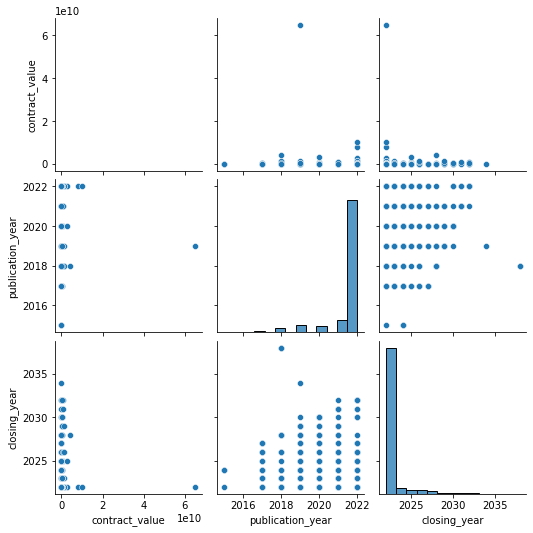

In [126]:
sns.pairplot(df)

<AxesSubplot:title={'center':'Tender Status for Submitting Bids'}, xlabel='procurement_stage', ylabel='count'>

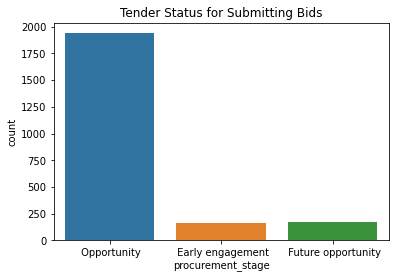

In [133]:
plt.title("Tender Status for Submitting Bids")
sns.countplot(x=df['procurement_stage'])

In [134]:
df.columns

Index(['title', 'dept', 'procurement_stage', 'notice_status',
       'contract location', 'contract_value', 'publication_year',
       'closing_year', 'status'],
      dtype='object')

<AxesSubplot:title={'center':'Tender Published Years'}, xlabel='publication_year', ylabel='count'>

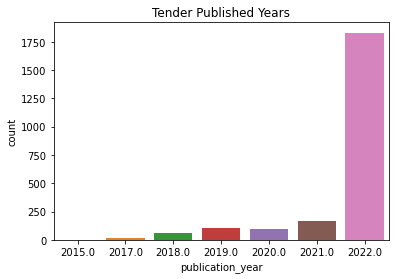

In [137]:
plt.title("Tender Published Years")
sns.countplot(x=df['publication_year'])

<AxesSubplot:title={'center':'Closing year for Recieving Bids'}, xlabel='closing_year', ylabel='count'>

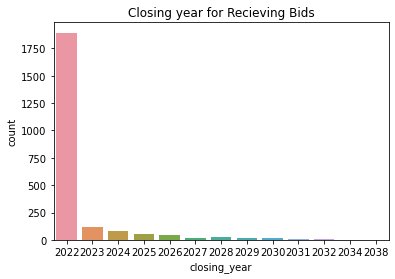

In [139]:
plt.title("Closing year for Recieving Bids")
sns.countplot(x=df['closing_year'])

Closing Represents that bidding for Tender is going to end
Approach is Approach to market it is says that bidding for new tender is going to opened in the site


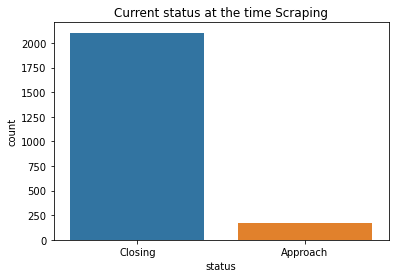

In [143]:
plt.title("Current status at the time Scraping")
sns.countplot(x=df['status'])
print("Closing Represents that bidding for Tender is going to end")
print("Approach is Approach to market it is says that bidding for new tender is going to opened in the site")

<AxesSubplot:title={'center':'Status vs Publication year'}, xlabel='status', ylabel='count'>

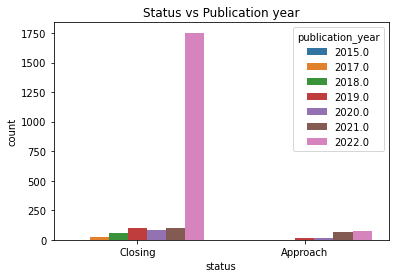

In [158]:
plt.title("Status vs Publication year")
sns.countplot(x=df['status'],hue=df['publication_year'])

<AxesSubplot:xlabel='status', ylabel='count'>

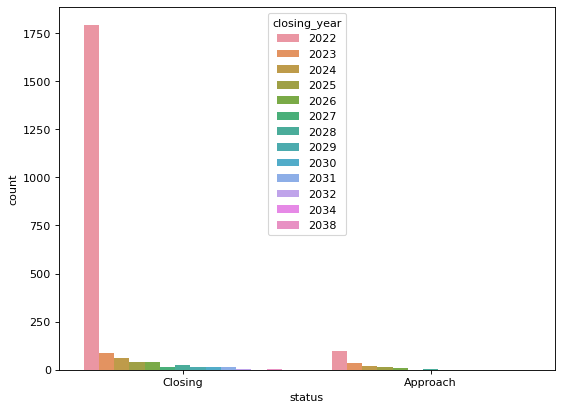

In [161]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.title("Status vs  Clsoing Year")
sns.countplot(x=df['status'],hue=df['closing_year'])